Code implements Batch "vanilla" Gradient Descent Algorithm to build a Linear Regression model<br>
**Note:** Code is vectorized and, therefore, not restricted to to Simple Linear Regression.
To extend to problems larger than 2D, you need to only modify the plot_GD function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Linear_regression_GD():

    """Using Batch Gradient Descent to build a Linear Regression model"""
    
    theta_history = None
    J_history = None
    iter = 0
    alpha = None

    def __init__(self):
        return

    def h_theta(self, X, theta_T):
        """Computes Hypothesis function"""

        return (theta_T @ X).T

    def J_theta(self, h, y):
        """Computes Cost function"""

        return  0.5 * np.mean((h - y) ** 2)
    
    def J_prime(self, h, y, X):
        """Computes Gradient of Cost function"""

        return np.mean(X @ (h - y))

    def plot_GD(self):
        fig, axs = plt.subplots(nrows=1, ncols=3)
        # Plot Error vs Iteration
        axs[0].plot(np.arange(0, self.iter + 1), self.J_history, linestyle='-', marker='.', markerfacecolor='r')
        axs[0].set_xlabel("Iteration")
        axs[0].set_ylabel("MSE")

        # Plot Error vs theta_0
        axs[1].plot(self.theta_history[0, :], self.J_history, linestyle='-', marker='.', markerfacecolor='r')
        axs[1].set_xlabel("$\\theta_0$")
        axs[1].set_ylabel("MSE")
        # Plot Error vs theta_1
        axs[2].plot(self.theta_history[1, :], self.J_history, linestyle='-', marker='.', markerfacecolor='r')
        axs[2].set_xlabel("$\\theta_1$")
        axs[2].set_ylabel("MSE")

        #fig.tight_layout()
        fig.suptitle("Convergance at $\\alpha =$ " + str(self.alpha), fontsize=16)
        plt.show()

    def optimize(self, X, y, alpha=0.001):
        """
        Optimize weights using Gradient Descent
        
        Arguments:

        X = Design Matrix (Transpose of dataset, with numerical values)
        y = actual values for target variable
        alpha = Learning Rate
        """
        # Zeroth Iteration
        self.iter = 0
        self.alpha= alpha
        theta = np.zeros((len(X), 1)) # Initialize weight vector
        h = self.h_theta(X, theta.T)
        self.theta_history = theta
        self.J_history = self.J_theta(h, y)

        while (self.iter < 1e2):
            self.iter += 1
            # Update weight values
            theta = theta - alpha * self.J_prime(h, y, X)
            h = self.h_theta(X, theta.T)
            # Record history for plot
            self.theta_history = np.hstack((self.theta_history, theta))
            self.J_history = np.append(self.J_history, self.J_theta(h, y))
        
        return theta

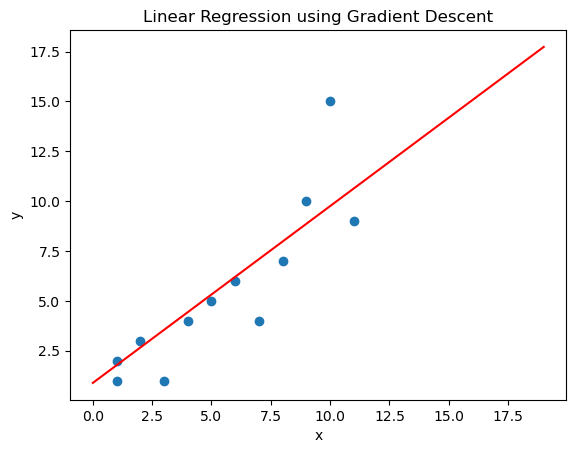

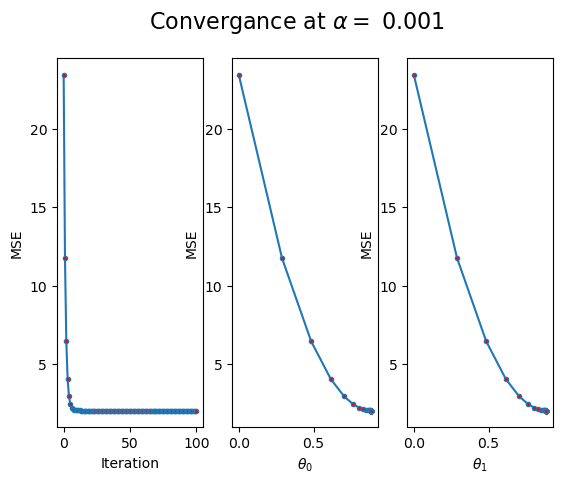

In [3]:
lr = Linear_regression_GD()
x_points = np.array([1,1,2,3,4,5,6,7,8,9,10,11])
y_points = np.array([1,2,3,1,4,5,6,4,7,10,15,9])

X = np.vstack((np.ones_like(x_points), x_points))
y = y_points[:, np.newaxis]

theta = lr.optimize(X, y)
# Plot solution
plt.scatter(x_points, y_points)
plt.plot(np.arange(0, 20), theta[0] + theta[1] * np.arange(0, 20), color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.show()

# Plot GD convergence
lr.plot_GD()